# Bank Transaction Fraud Detection 

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
data=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/New folder/data.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

# Observations:
<b> Dataset has total 6.3 M records with 11 columns(features) </b>

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Observations:
<b> Dataset is cleaned no missing values </b>

In [6]:
# Getting Counts of Type of Transaction with Fraud =0 and Fraud=1
data['Counts'] = data.groupby(['type','isFraud'])['type'].transform('count')

In [7]:
# Getting Counts of Type of Transaction
data['Counts_Overall_type'] = data.groupby(['type'])['type'].transform('count')

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,2151495,2151495
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,2151495,2151495
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4097,532909
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,4116,2237500
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,2151495,2151495


# Visualizing different type of transaction made by user and count of it

In [9]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# Observations: 
<b><br>Cash Out is the most popular transaction type made by user i.e. 2237500 </b></br>
<b><br> Debit is the least transaction type made by user i.e. 41432 </b></br>

# Understanding fraud and non fraud tarnsactions made

Text(0.5, 1.0, 'Fraud Transaction Counts VS Valid Transactions Count')

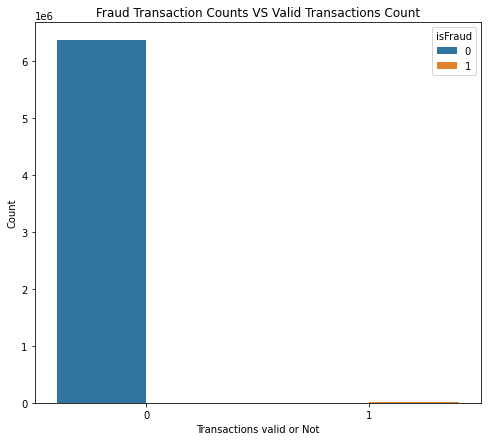

In [10]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="isFraud", data=data,hue="isFraud",ax=ax)
plt.xlabel("Transactions valid or Not")
plt.ylabel("Count")
plt.title("Fraud Transaction Counts VS Valid Transactions Count")

In [11]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# Observations
<br><b> Valid Transaction are much more than invalid transactions. 8213 transactions are invalid and 6.3 M transactions are valid</b></br>

In [12]:
# Downsampling
# As every target category has different sets of records performing downsampling
label=data['isFraud']

g = data.groupby(label, group_keys=False)
data = pd.DataFrame(g.apply(lambda x: 
x.sample(g.size().min()).
reset_index(drop=True)))
data['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [13]:
data['type'].value_counts()

CASH_OUT    7017
TRANSFER    4784
PAYMENT     2768
CASH_IN     1800
DEBIT         57
Name: type, dtype: int64

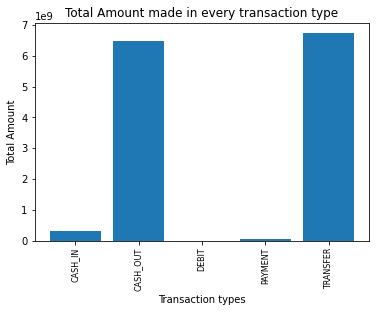

In [14]:
transaction_types = [types for types, df in data.groupby(['type'])]

plt.bar(transaction_types,data.groupby(['type']).sum()['amount'])
plt.ylabel('Total Amount')
plt.xlabel('Transaction types')
plt.xticks(transaction_types, rotation='vertical', size=8)
plt.title("Total Amount made in every transaction type")
plt.show()

In [15]:
data.groupby(['type']).sum()['amount']

type
CASH_IN     2.995456e+08
CASH_OUT    6.494948e+09
DEBIT       2.545149e+05
PAYMENT     3.539101e+07
TRANSFER    6.728376e+09
Name: amount, dtype: float64

# Observations:
<b><br> Amount of Transaction made by Transfer is the largest  even though it had very few Transfer Transactions made </br></b>
<b><br> While Payment transaction count was high but Amount of transaction made by Payment is less than rest type of transactions </br></b>


In [16]:
# Checking Illegal Attempt of Transfer (Amount >200)
print((data["isFraud"] == 1).sum())
print((data["isFraud"] == 0).sum())
(data["isFlaggedFraud"] == 1).sum()

8213
8213


16

# Observations:
<br><b> Out of 8213 Fraud Transactions only 16 of them are considered Flagged Fraud because transactions which are greater thean >200 is flagged Fraud</br></b>
<br><b> Flagged Fraud are not even 1% of Total Fraud Transactions made</br></b>

# Visualizing different types of Transactions with their count of Frauds transactions

<AxesSubplot:xlabel='type', ylabel='count'>

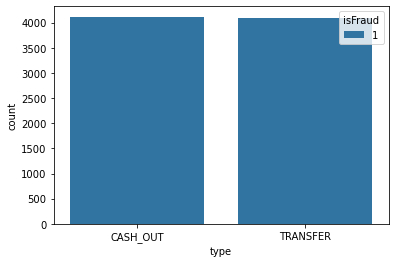

In [17]:
data1=data[data["isFraud"]==1]
sns.countplot(x='type',hue='isFraud',data=data1)

In [18]:
data1.groupby(['type']).sum()['isFraud']

type
CASH_OUT    4116
TRANSFER    4097
Name: isFraud, dtype: int64

# Observations:
<br><b> Of all the different types of transactions made CashOut and Transfer has only Fraud Cases i.e. CashIn, Debit and Payment has no Fraud cases </b></br>

In [19]:
data['Percentage']=(data['Counts']/data['Counts_Overall_type'])*100

In [20]:
data3=data[['type','isFraud','Percentage']]

<AxesSubplot:xlabel='type', ylabel='Percentage'>

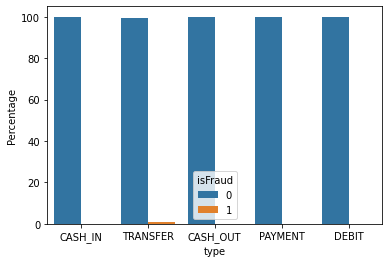

In [21]:
sns.barplot(x='type',y='Percentage',hue='isFraud',data=data3)

In [22]:
data3.value_counts()

type      isFraud  Percentage
CASH_OUT  1        0.183955      4116
TRANSFER  1        0.768799      4097
CASH_OUT  0        99.816045     2901
PAYMENT   0        100.000000    2768
CASH_IN   0        100.000000    1800
TRANSFER  0        99.231201      687
DEBIT     0        100.000000      57
dtype: int64

# Observations: 
<b><br> Fraud cases are very minimal around 0.76 % for Transfer and 0.18 % for Cash_Out </br></b>

In [23]:
# Extracting hour of day from Step Column
data['transactionHour'] = data['step'] % 24

In [24]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour
0,398,CASH_IN,172790.03,C537966719,2536449.75,2709239.78,C155082523,354195.74,181405.71,0,0,1399284,1399284,100.0,14


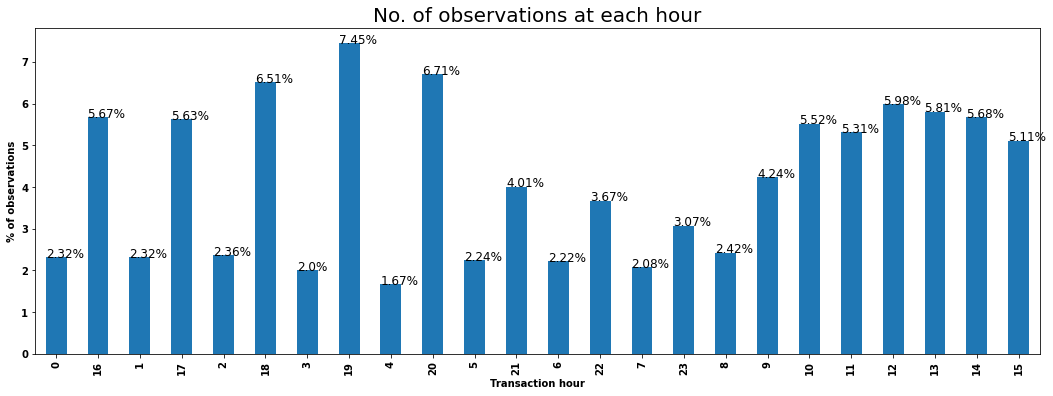

In [25]:
# reference: https://stackoverflow.com/questions/49059956/pandas-plot-value-counts-barplot-in-descending-manner
plt.figure(figsize=(18,6))
ax = (data['transactionHour'].value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Transaction hour', fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.ylabel('% of observations', fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.title('No. of observations at each hour', fontsize=20)
plt.show()

# Observations: 
<b><br> Most of transactions occur between 9 am - 8 pm </br></b>

In [26]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour
0,398,CASH_IN,172790.03,C537966719,2536449.75,2709239.78,C155082523,354195.74,181405.71,0,0,1399284,1399284,100.0,14


In [27]:
# For Outgoing transactions 
# Error=(Amount-OldBalance)+NewBalance should be 0 

In [28]:
data['errorBalanceOriginal'] = data['amount'] - data['oldbalanceOrg']+ data['newbalanceOrig'] 

In [29]:
data[data['errorBalanceOriginal']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,errorBalanceOriginal
5,354,PAYMENT,19207.56,C869140324,48908.00,29700.44,M22240572,0.00,0.00,0,0,2151495,2151495,100.000000,18,0.0
11,352,CASH_OUT,174874.39,C1567968097,555183.12,380308.73,C2131416920,1338371.38,1513245.77,0,0,2233384,2237500,99.816045,16,0.0
13,212,PAYMENT,2477.51,C594267602,52736.00,50258.49,M134993353,0.00,0.00,0,0,2151495,2151495,100.000000,20,0.0
39,35,PAYMENT,1696.47,C1194789888,63088.67,61392.20,M2007925915,0.00,0.00,0,0,2151495,2151495,100.000000,11,0.0
58,180,PAYMENT,4354.10,C150576596,187903.00,183548.90,M1137521819,0.00,0.00,0,0,2151495,2151495,100.000000,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,648,TRANSFER,1005346.72,C278258075,1005346.72,0.00,C28830193,0.00,0.00,1,0,4097,532909,0.768799,0,0.0
8209,577,TRANSFER,113687.00,C379022466,113687.00,0.00,C1223894198,0.00,0.00,1,0,4097,532909,0.768799,1,0.0
8210,297,TRANSFER,3105902.49,C483009518,3105902.49,0.00,C1272462265,0.00,0.00,1,0,4097,532909,0.768799,9,0.0
8211,446,CASH_OUT,311487.14,C171655471,311487.14,0.00,C73957643,753508.71,1064995.85,1,0,4116,2237500,0.183955,14,0.0


In [30]:
# Similarly for destination account valid for outgoing transactions only
data['errorBalanceDestination'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']

In [31]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,errorBalanceOriginal,errorBalanceDestination
0,398,CASH_IN,172790.03,C537966719,2536449.75,2709239.78,C155082523,354195.74,181405.71,0,0,1399284,1399284,100.0,14,345580.06,345580.06


In [32]:
# Understanding more about Fraud Cases 
data1=data[data['isFraud']==1]

In [33]:
# Checking if old balance original and new balance original wrt Fraud Cases
# Reference: https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior
data2=data1[(data1['oldbalanceOrg']==0) & (data1['newbalanceOrig']==0)]

In [34]:
len(data2)

41

In [35]:
len(data1)

8213

In [36]:
41/8213

0.00499208571776452

# Observations:
<br> 0.5% of total fraud cases occur when Old And New Balance Original are 0</br>

In [37]:
# Checking if old balance original and new balance original wrt Fraud Cases
# Reference: https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior
data3=data1[(data1['oldbalanceDest']==0) & (data1['newbalanceDest']==0)]

In [38]:
len(data3)

4076

# Observations:
<br> Around 50% of total fraud points are when Old and New Destination is 0 </br>

In [40]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,errorBalanceOriginal,errorBalanceDestination
0,398,CASH_IN,172790.03,C537966719,2536449.75,2709239.78,C155082523,354195.74,181405.71,0,0,1399284,1399284,100.000000,14,345580.06,3.455801e+05
1,547,CASH_IN,89523.46,C1613345463,7333933.85,7423457.31,C1495397465,240134.59,150611.13,0,0,1399284,1399284,100.000000,19,179046.92,1.790469e+05
2,131,TRANSFER,519186.22,C690828406,45691.39,0.00,C306779155,749757.08,1268943.30,0,0,528812,532909,99.231201,11,473494.83,-2.328306e-10
3,15,CASH_OUT,416961.36,C212907972,0.00,0.00,C979637490,1834484.90,2251446.26,0,0,2233384,2237500,99.816045,15,416961.36,0.000000e+00
4,328,PAYMENT,10352.15,C150456811,0.00,0.00,M2096233213,0.00,0.00,0,0,2151495,2151495,100.000000,16,10352.15,1.035215e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,648,TRANSFER,1005346.72,C278258075,1005346.72,0.00,C28830193,0.00,0.00,1,0,4097,532909,0.768799,0,0.00,1.005347e+06
8209,577,TRANSFER,113687.00,C379022466,113687.00,0.00,C1223894198,0.00,0.00,1,0,4097,532909,0.768799,1,0.00,1.136870e+05
8210,297,TRANSFER,3105902.49,C483009518,3105902.49,0.00,C1272462265,0.00,0.00,1,0,4097,532909,0.768799,9,0.00,3.105902e+06
8211,446,CASH_OUT,311487.14,C171655471,311487.14,0.00,C73957643,753508.71,1064995.85,1,0,4116,2237500,0.183955,14,0.00,0.000000e+00


In [41]:
X=data.drop(data.columns[[9]], axis=1)

In [42]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,errorBalanceOriginal,errorBalanceDestination
0,398,CASH_IN,172790.03,C537966719,2536449.75,2709239.78,C155082523,354195.74,181405.71,0,1399284,1399284,100.000000,14,345580.06,3.455801e+05
1,547,CASH_IN,89523.46,C1613345463,7333933.85,7423457.31,C1495397465,240134.59,150611.13,0,1399284,1399284,100.000000,19,179046.92,1.790469e+05
2,131,TRANSFER,519186.22,C690828406,45691.39,0.00,C306779155,749757.08,1268943.30,0,528812,532909,99.231201,11,473494.83,-2.328306e-10
3,15,CASH_OUT,416961.36,C212907972,0.00,0.00,C979637490,1834484.90,2251446.26,0,2233384,2237500,99.816045,15,416961.36,0.000000e+00
4,328,PAYMENT,10352.15,C150456811,0.00,0.00,M2096233213,0.00,0.00,0,2151495,2151495,100.000000,16,10352.15,1.035215e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,648,TRANSFER,1005346.72,C278258075,1005346.72,0.00,C28830193,0.00,0.00,0,4097,532909,0.768799,0,0.00,1.005347e+06
8209,577,TRANSFER,113687.00,C379022466,113687.00,0.00,C1223894198,0.00,0.00,0,4097,532909,0.768799,1,0.00,1.136870e+05
8210,297,TRANSFER,3105902.49,C483009518,3105902.49,0.00,C1272462265,0.00,0.00,0,4097,532909,0.768799,9,0.00,3.105902e+06
8211,446,CASH_OUT,311487.14,C171655471,311487.14,0.00,C73957643,753508.71,1064995.85,0,4116,2237500,0.183955,14,0.00,0.000000e+00


In [43]:
y=data['isFraud'].values

In [44]:

X=data[['type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','transactionHour','errorBalanceOriginal','errorBalanceDestination']]
y=data['isFraud'].values

In [45]:
X.head(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,transactionHour,errorBalanceOriginal,errorBalanceDestination
0,CASH_IN,172790.03,C537966719,2536449.75,2709239.78,C155082523,354195.74,181405.71,14,345580.06,345580.06


In [46]:
# Splitting Train Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=1)

# Type encoding

In [47]:
# Knowing unique values in school_state
print(len(X_train['type'].unique()))


5


In [48]:
# Encode the column using label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
encoded_train_type=labelencoder.fit_transform(X_train['type'])
encoded_train_type.shape

(13140,)

In [49]:
# Similarly do for test data 
encoded_test_type=labelencoder.transform(X_test['type'])
encoded_test_type.shape

(3286,)

# Encoding all Numerical Features

In [50]:
# Train data for  numerical columns
X_train_amount = X_train['amount'].values.reshape(-1,1)
X_train_oldbalanceOrg = X_train['oldbalanceOrg'].values.reshape(-1,1)
X_train_newbalanceOrig = X_train['newbalanceOrig'].values.reshape(-1,1)
X_train_oldbalanceDest = X_train['oldbalanceDest'].values.reshape(-1,1)
X_train_newbalanceDest = X_train['newbalanceDest'].values.reshape(-1,1)
X_train_transactionHour = X_train['transactionHour'].values.reshape(-1,1)
X_train_errorBalanceOrig = X_train['errorBalanceOriginal'].values.reshape(-1,1)
X_train_errorBalanceDestination = X_train['errorBalanceDestination'].values.reshape(-1,1)

# Test data for  numerical columns
X_test_amount = X_test['amount'].values.reshape(-1,1)
X_test_oldbalanceOrg = X_test['oldbalanceOrg'].values.reshape(-1,1)
X_test_newbalanceOrig = X_test['newbalanceOrig'].values.reshape(-1,1)
X_test_oldbalanceDest = X_test['oldbalanceDest'].values.reshape(-1,1)
X_test_newbalanceDest = X_test['newbalanceDest'].values.reshape(-1,1)
X_test_transactionHour = X_test['transactionHour'].values.reshape(-1,1)
X_test_errorBalanceOrig = X_test['errorBalanceOriginal'].values.reshape(-1,1)
X_test_errorBalanceDestination = X_test['errorBalanceDestination'].values.reshape(-1,1)

# Concatenating 2 numerical columns for train and test data
numerical_feat_train = np.concatenate((X_train_amount, X_train_oldbalanceOrg,X_train_newbalanceOrig,X_train_oldbalanceDest, X_train_newbalanceDest, X_train_transactionHour, X_train_errorBalanceOrig, X_train_errorBalanceDestination), axis=1) # column wise
numerical_feat_test = np.concatenate((X_test_amount, X_test_oldbalanceOrg,X_test_newbalanceOrig, X_test_oldbalanceDest, X_test_newbalanceDest,X_test_transactionHour, X_test_errorBalanceOrig, X_test_errorBalanceDestination ), axis=1) # Column wise

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
numeric_norm_train = normalizer.fit_transform(numerical_feat_train)
numeric_norm_test = normalizer.transform(numerical_feat_test)

In [51]:
numeric_norm_train.shape

(13140, 8)

In [52]:
train_type = np.expand_dims(encoded_train_type, axis=1)
test_type=np.expand_dims(encoded_test_type, axis=1)

In [53]:
# Concatenate all features
x=np.concatenate((train_type,numeric_norm_train), axis=1)
y=np.concatenate((test_type,numeric_norm_test), axis=1)

In [54]:
y.shape

(3286, 9)

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [56]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

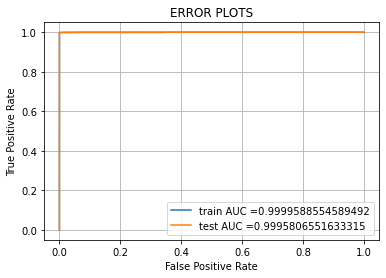

In [57]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
# Classifier with parameter
from sklearn.ensemble import RandomForestClassifier
est1=RandomForestClassifier(n_jobs=-1, bootstrap=False, criterion='gini', max_depth= 8,min_samples_leaf= 5, n_estimators= 100)
est1.fit(x, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(est1, x)    
y_test_pred = batch_predict(est1, y)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Observations:
<br><b> Test AUC is 99.96 % meaning an given point the model will predict it correctly as Valid or Invalid Transactions by 99.96% </br></b>

In [58]:
# Accuracy 
y_pred=est1.predict(y) # predicting the data on test data points
y_pred #
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9990870359099209

In [59]:
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# getting feature importance 
importance=est1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.04217
Feature: 1, Score: 0.10696
Feature: 2, Score: 0.17073
Feature: 3, Score: 0.15773
Feature: 4, Score: 0.00914
Feature: 5, Score: 0.02496
Feature: 6, Score: 0.02813
Feature: 7, Score: 0.42697
Feature: 8, Score: 0.03322


# Observations:
<br>X_train_amount , X_train_newbalanceOrig, X_train_newbalanceDest and X_train_errorBalanceOrig are the best features for Model prediction , can use these subset of features for only Model Building and Prediction and see the results</br>

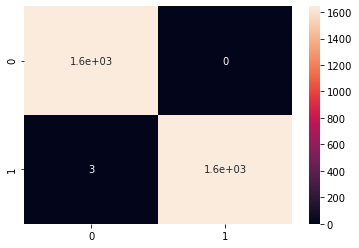

array([[1643,    0],
       [   3, 1640]], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)
sns.heatmap(cm1,annot=True)
plt.show(ax)
cm1

# Observations:
<br> Model is making very few errors in predicting Valid Transactions as Invalid Transactions while only 1 error in Predicting Invalid Transactions as Valid Transactions which is very good </br>

# Decision Tree

In [194]:
# Trying the Hyperparameter Tuning for Decision Tree
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random_grid_dt={'max_depth':[2,4,6,8,12,15,25,50,75],
                'splitter':['best', 'random'],
             'criterion':['gini','entropy']
             }

In [195]:
# Creating a function 
def hypertuning_dtcv(est,random_grid,nbr_iter,X,y):
    dtsearch=RandomizedSearchCV(est,param_distributions=random_grid,n_jobs=-1,n_iter=nbr_iter,cv=3,return_train_score=True) # kfold cv=5 
    dtsearch.fit(x,y_train)  # Fitting the RandomizedSearchCV on data
    ht_params=dtsearch.best_params_ # Getting best parameters 
    ht_score=dtsearch.best_score_ # Getting Score of randomziedSearchCV
    results_dt=pd.DataFrame(dtsearch.cv_results_)
    return ht_params,ht_score,results_dt

In [196]:
dt_parameters, dt_ht_score,results_dt=hypertuning_dtcv(dtc,random_grid_dt,3,x,y_train) # 3 possible random combinations(options) to selected 

In [197]:
results_dt[['param_splitter','param_max_depth','param_criterion','mean_test_score','mean_train_score']]

,param_splitter,param_max_depth,param_criterion,mean_test_score,mean_train_score
0,random,50,entropy,0.999978,0.999999
1,best,12,entropy,0.999992,0.999999
2,random,15,gini,0.999750,0.999761


In [198]:
dt_parameters

{'splitter': 'best', 'max_depth': 12, 'criterion': 'entropy'}

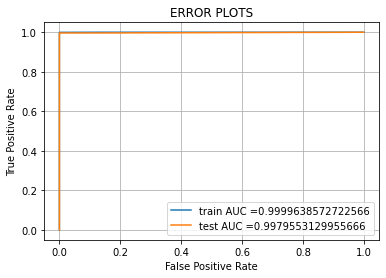

In [200]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
# Classifier with parameter
dtc1=DecisionTreeClassifier(criterion='entropy', max_depth= 12,splitter='best')
dtc1.fit(x, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc1, x)    
y_test_pred = batch_predict(dtc1, y)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# observations:
<br><b> Test AUC score is 99.79% i.e. Given a point it will be 99.79% correctly predicted as Valid or invalid transactions </br></b>

In [201]:
# Accuracy 
y_pred=dtc1.predict(y) # predicting the data on test data points
y_pred 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999921416020444

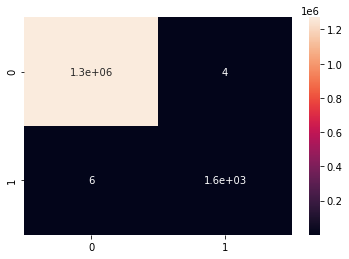

array([[1270877,       4],
       [      6,    1637]], dtype=int64)

In [203]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show(ax)
cm

# Observations:
<br><b>Model is performing well making very few errors when Actual label is 1(Invalid Transaction) while prediction is 0(Valid Transaction)</br></b>
<br><b>Model making very few errors when actual label is 0(Valid Transaction) but prediction is 1 i.e. Invalid Transaction</br></b>

In [204]:
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# getting feature importance 
importance=dtc1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.00999
Feature: 1, Score: 0.00014
Feature: 2, Score: 0.00100
Feature: 3, Score: 0.76990
Feature: 4, Score: 0.00053
Feature: 5, Score: 0.01193
Feature: 6, Score: 0.00418
Feature: 7, Score: 0.20150
Feature: 8, Score: 0.00083


# Observations:
<br> X_train_newbalanceOrig and X_train_errorBalanceOrig are two most important features for Decision Tree Model </br>
<br> Can use these subsets of features only for model building and gettting prediction results later instead of using all features </br>

In [59]:
### XgBosst Classifier
import xgboost as xg
xgb_r = xg.XGBClassifier()

In [61]:
xgb_r.fit(x,y_train)
# predict
y_pred_xg=xgb_r.predict(y)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_xg)

0.9981740718198417

# Observations: Accuracy is 99.81% 

In [74]:
# Hyperparameter Tuning for XgBoost 

In [75]:
# Trying the Hyperparameter Tuning for Logistic Regression
xgb=xg.XGBClassifier()
random_grid_1={'max_depth': [2,5,7,9,10,12,14,15,18,20,25,30,35,50,70,100],
    'reg_alpha':[0.00001,0.0001,0.001,0.01,0.1,0.5],
    'subsample': [0.001,0.1,0.3,0.6,0.8,1],
    'colsample_bytree': [0.1,0.3,0.5,0.7,1],
    'gamma': [0.0001,0.001,0.01,0.1,0.3,0.6,0.8],
    'n_estimators':[10,20,25,30,40,50,70,85,100,120,150,200]
             }

In [102]:
# Creating a function 
from sklearn.model_selection import RandomizedSearchCV
def hypertuning_lrcv(xgb,random_grid_1,nbr_iter,X,y):
    xgbsearch=RandomizedSearchCV(xgb,param_distributions=random_grid_1,n_jobs=-1,n_iter=nbr_iter,cv=5,return_train_score=True)
    xgbsearch.fit(x,y_train)  # Fitting the RandomizedSearchCV on data
    ht_params=xgbsearch.best_params_ # Getting best parameters 
    ht_score=xgbsearch.best_score_ # Getting Score of randomziedSearchCV
    results_lr=pd.DataFrame(xgbsearch.cv_results_)
    return ht_params,ht_score,results_lr

In [77]:
lr_parameters, lr_ht_score,results_lr=hypertuning_lrcv(xgb,random_grid_1,10,x,y_train)

In [78]:
results_lr[['param_max_depth','param_reg_alpha','param_subsample','mean_train_score','mean_test_score']]

,param_max_depth,param_reg_alpha,param_subsample,mean_train_score,mean_test_score
0,12,0.00001,0.3,0.998992,0.998326
1,50,0.01,0.001,0.929281,0.930746
2,7,0.5,0.001,0.890183,0.890868
3,14,0.00001,0.8,0.997622,0.989117
4,15,0.0001,0.001,0.963775,0.965221
5,15,0.01,0.001,0.777892,0.778843
6,7,0.5,0.6,0.998402,0.996043
7,15,0.1,0.6,0.999943,0.998174
8,18,0.1,0.6,0.999049,0.998250
9,12,0.001,0.1,0.997146,0.996195


In [79]:
lr_parameters

{'subsample': 0.3,
 'reg_alpha': 1e-05,
 'n_estimators': 150,
 'max_depth': 12,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [80]:
classifier_xgb=xg.XGBClassifier(subsample= 0.3,reg_alpha= 0.00001,max_depth=12,colsample_bytree=0.3, gamma=0.3,n_estimators=150).fit(x,y_train)

In [81]:
y_pred3=classifier_xgb.predict(y)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred3)

0.9981740718198417

# Accuracy is 99.82%

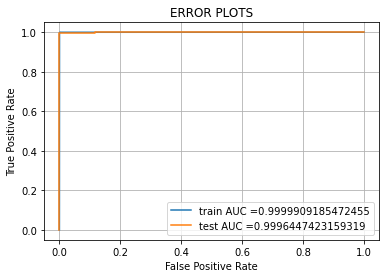

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
# Classifier with parameter
classifier_xgb=xg.XGBClassifier(subsample= 0.3,reg_alpha= 0.00001,max_depth=12,colsample_bytree=0.3, gamma=0.3,n_estimators=150)
classifier_xgb.fit(x, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(classifier_xgb, x)    
y_test_pred = batch_predict(classifier_xgb, y)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# AUC Score is 99.96%

In [85]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred3)
cm

array([[1642,    1],
       [   5, 1638]], dtype=int64)

# Logistic Regression

In [73]:
X=data[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','transactionHour','errorBalanceOriginal','errorBalanceDestination']]
y=data['isFraud'].values

In [74]:
# Splitting Train Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=1)

In [77]:
from sklearn.preprocessing import OneHotEncoder
train1 = pd.DataFrame(X_train['type'])
test1 = pd.DataFrame(X_test['type'])
enc = OneHotEncoder(handle_unknown = 'ignore')
encode_train_type=enc.fit_transform(train1).toarray()
print(encode_train_type.shape)
print(type(encode_train_type))
encode_test_type=enc.transform(test1).toarray()
print(encode_test_type.shape)

(13140, 5)
<class 'numpy.ndarray'>
(3286, 5)


In [78]:
X_train.drop(X_train.columns[[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[[0]], axis=1, inplace=True)

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
X_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transactionHour,errorBalanceOriginal,errorBalanceDestination
3572,81737.98,16038.00,0.00,389456.70,471194.69,18,6.569998e+04,-0.01
873,7859.03,1711482.99,1719342.02,1540144.76,1532285.73,21,1.571806e+04,15718.06
2758,409968.35,0.00,0.00,2119118.87,2529087.22,9,4.099683e+05,0.00
8062,390275.11,1762005.17,2152280.28,1299655.42,909380.31,17,7.805502e+05,780550.22
4978,97888.54,107576.00,9687.46,0.00,97888.54,14,-7.275958e-12,0.00
...,...,...,...,...,...,...,...,...
8148,21890.64,104414.78,82524.14,0.00,0.00,13,0.000000e+00,21890.64
8014,2070814.27,2070814.27,0.00,0.00,0.00,15,0.000000e+00,2070814.27
4713,156004.87,195601.06,39596.19,573503.64,729508.51,15,0.000000e+00,0.00
5663,88909.04,22038.00,0.00,0.00,88909.04,20,6.687104e+04,0.00


In [88]:
# logistic regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X_train) # This converts column names into index numbers 0,1....


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transactionHour,errorBalanceOriginal,errorBalanceDestination
3854,-0.439825,-0.376815,-0.204258,-0.328073,-0.413285,-0.242548,-0.207729,-0.273865
3880,-0.391447,-0.354656,-0.211602,-0.189457,-0.270096,-0.905177,-0.207729,-0.274607
1089,-0.290110,-0.296390,-0.211602,-0.328073,-0.413285,-1.567806,-0.207729,-0.076359
3549,3.341502,1.791702,-0.211602,-0.328073,-0.413285,1.579682,-0.207729,4.714530
5770,-0.332426,-0.320721,-0.211602,0.825221,0.586821,0.254424,-0.207729,-0.274607


In [89]:
X_test_std=sc.transform(X_test)

In [92]:
# Concatenating all columns for train and test data
X_tr = np.concatenate((X_std,encode_train_type ), axis=1) # column wise
print(X_tr.shape)
print(type(X_tr))
X_te = np.concatenate((X_test_std,encode_test_type), axis=1) # Column wise
print(X_te.shape)
print(type(X_te))

(13140, 13)
<class 'numpy.ndarray'>
(3286, 13)
<class 'numpy.ndarray'>


In [93]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_tr, y_train)

In [94]:
# getting feature importance 
importance=clf.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 11.72534
Feature: 1, Score: 5.22255
Feature: 2, Score: -3.59702
Feature: 3, Score: -1.12726
Feature: 4, Score: 1.04010
Feature: 5, Score: -0.66552
Feature: 6, Score: -7.77881
Feature: 7, Score: 11.44270
Feature: 8, Score: -3.32705
Feature: 9, Score: 2.98794
Feature: 10, Score: -0.71666
Feature: 11, Score: -3.35154
Feature: 12, Score: 4.40377


# Amount, oldbalanceOrg, errorBalanceOriginal and errorBalanceDestination are important features

In [98]:
y_pred2=clf.predict(X_te)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9440048691418138

In [100]:
# Trying the Hyperparameter Tuning for Logistic Regression
lr=LogisticRegression(n_jobs=-1)
random_grid_1={'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.0001,0.001,0.01,0.1,1,10,25,50,100,150,300,500],
            'tol':[0.00001,0.0001,0.001,0.01,0.5,0.1,1,10],
             'solver':['newton-cg','sag','saga'],
             }

In [103]:
lr_parameters, lr_ht_score,results_lr=hypertuning_lrcv(lr,random_grid_1,5,X_tr,y_train)

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.94200913        nan 0.9412481         nan 0.95106545]
  category=UserWarning
C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the train scores are non-finite: [0.94159056        nan 0.94092466        nan 0.9516172 ]
  category=UserWarning


In [104]:
results_lr[['param_solver','param_penalty','param_C','mean_train_score','mean_test_score']]

,param_solver,param_penalty,param_C,mean_train_score,mean_test_score
0,saga,l1,500,0.941591,0.942009
1,newton-cg,elasticnet,500,NaN,NaN
2,saga,l2,150,0.940925,0.941248
3,sag,l1,0.01,NaN,NaN
4,saga,l1,150,0.951617,0.951065


In [105]:
lr_parameters

{'tol': 0.01, 'solver': 'saga', 'penalty': 'l1', 'C': 150}

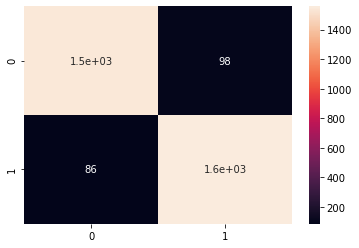

array([[1545,   98],
       [  86, 1557]], dtype=int64)

In [106]:
lr=LogisticRegression(n_jobs=-1,solver='saga',penalty='l1',C=150, tol=0.01).fit(X_tr, y_train)
y_pred2=clf.predict(X_te)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)
plt.show(ax)
cm

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9440048691418138

# KNN Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_tr, y_train)

KNeighborsClassifier()

In [111]:
y_pred2=classifier.predict(X_te)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.956177723676202

In [118]:
# Choosing the optimal nearest neigbors
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_train)
    pred_i = knn.predict(X_te)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

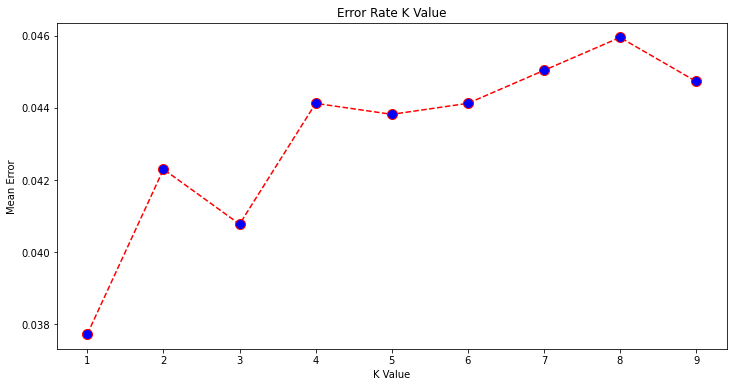

In [119]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [120]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_tr, y_train)

KNeighborsClassifier(n_neighbors=3)

In [121]:
y_pred2=classifier.predict(X_te)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9592209373097992

# Accuracy with KNN Classifier is 96%

In [123]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Test-AUC","Test Accuracy"]

x.add_row([ "Random Forest", 0.99963,0.999994])
x.add_row([ "Decision Tree with Hyperparameter Tuning", 0.9979,0.999992])
x.add_row(["Xgboost with Hyperparameter Tuning", 0.9996,0.9982])
x.add_row(["Logistic Regression with Hyperparameter Tuning", 0.93,0.9440])
x.add_row(["KNN Classifier", 0.95,0.96])
print(x)

+------------------------------------------------+----------+---------------+
|                     Model                      | Test-AUC | Test Accuracy |
+------------------------------------------------+----------+---------------+
|                 Random Forest                  | 0.99963  |    0.999994   |
|    Decision Tree with Hyperparameter Tuning    |  0.9979  |    0.999992   |
|       Xgboost with Hyperparameter Tuning       |  0.9996  |     0.9982    |
| Logistic Regression with Hyperparameter Tuning |   0.93   |     0.944     |
|                 KNN Classifier                 |   0.95   |      0.96     |
+------------------------------------------------+----------+---------------+


## Observations:
### Random Forest is the best model among all the models build 
